## **Linear Regression**

 **Import Libraries**

In [136]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [137]:
import torch.nn as nn

**Initialize Tensor**

In [138]:
X = torch.linspace(1,50,50).reshape(-1,1)
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

**Initialize Error Values**

In [139]:
torch.manual_seed(59)
e = torch.randint(-8,9,(50,1),dtype = torch.float)
e

tensor([[-7.],
        [-1.],
        [ 4.],
        [-3.],
        [ 0.],
        [-7.],
        [-5.],
        [ 5.],
        [ 1.],
        [ 3.],
        [ 7.],
        [-2.],
        [ 7.],
        [-3.],
        [-6.],
        [-5.],
        [-3.],
        [ 0.],
        [ 8.],
        [-1.],
        [-8.],
        [-6.],
        [ 1.],
        [-5.],
        [ 8.],
        [-3.],
        [-8.],
        [-2.],
        [ 6.],
        [-4.],
        [-1.],
        [-6.],
        [-3.],
        [-5.],
        [-6.],
        [-4.],
        [-1.],
        [ 3.],
        [ 2.],
        [ 4.],
        [-5.],
        [ 6.],
        [-8.],
        [ 4.],
        [ 0.],
        [-8.],
        [ 2.],
        [ 6.],
        [ 2.],
        [ 5.]])

**Build Y**

In [140]:
y = 2*X + e

In [141]:
y.shape

torch.Size([50, 1])

**Convert to numpy() for plotting X vs y**

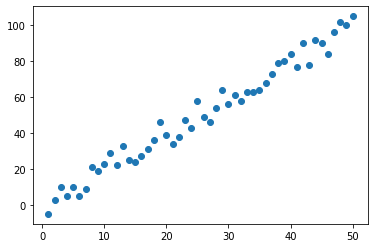

In [142]:
plt.scatter(X.numpy(),y.numpy())

**The Linear Model**

In [143]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [144]:
class Model(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.linear = nn.Linear(in_features,out_features)
  def forward(self,x):
    y_pred = self.linear(x)
    return y_pred

In [145]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


**Iterating over model parameters**

In [146]:
for name,param in model.named_parameters():
  print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


**Predicting y for different values of X**

In [147]:
x = torch.tensor([2.0])
x

tensor([2.])

In [148]:
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [149]:
x1 = torch.linspace(0.0,50.0,50)
x1.reshape(-1,50)

tensor([[ 0.0000,  1.0204,  2.0408,  3.0612,  4.0816,  5.1020,  6.1224,  7.1429,
          8.1633,  9.1837, 10.2041, 11.2245, 12.2449, 13.2653, 14.2857, 15.3061,
         16.3265, 17.3469, 18.3673, 19.3878, 20.4082, 21.4286, 22.4490, 23.4694,
         24.4898, 25.5102, 26.5306, 27.5510, 28.5714, 29.5918, 30.6122, 31.6327,
         32.6531, 33.6735, 34.6939, 35.7143, 36.7347, 37.7551, 38.7755, 39.7959,
         40.8163, 41.8367, 42.8571, 43.8776, 44.8980, 45.9184, 46.9388, 47.9592,
         48.9796, 50.0000]])

In [150]:
w1 = model.linear.weight.item()
b1 = model.linear.bias.item()

y1 = w1*x1+b1

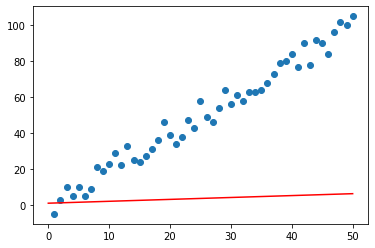

In [151]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1.detach().numpy().reshape(50),'r')

**Introducing a Loss function**

In [152]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
epochs = 50

**Error Calculation**

In [153]:
losses = []
for i in range(epochs):
  #PREDICTING THE FORWARD PASS
  y_pred = model.forward(X)
  #CALCULATE THE LOSS/ERROR
  loss = criterion(y_pred,y)
  losses.append(loss)
  print(f'epoch {i} loss:{loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 loss:2953.81689453125 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 1 loss:1536.684326171875 weight: 3.277780055999756 bias: 1.056783676147461
epoch 2 loss:805.0687255859375 weight: 0.9988558888435364 bias: 0.9878233075141907
epoch 3 loss:427.3611755371094 weight: 2.6363613605499268 bias: 1.0352259874343872
epoch 4 loss:232.3635711669922 weight: 1.4598523378372192 bias: 0.9990211129188538
epoch 5 loss:131.69252014160156 weight: 2.305255889892578 bias: 1.022890567779541
epoch 6 loss:79.71886444091797 weight: 1.697884202003479 bias: 1.0035967826843262
epoch 7 loss:52.88600540161133 weight: 2.1343536376953125 bias: 1.015317440032959
epoch 8 loss:39.03241729736328 weight: 1.8208072185516357 bias: 1.0047547817230225
epoch 9 loss:31.879528045654297 weight: 2.046158790588379 bias: 1.0102040767669678
epoch 10 loss:28.186002731323242 weight: 1.8843038082122803 bias: 1.0041495561599731
epoch 11 loss:26.278432846069336 weight: 2.0006625652313232 bias: 1.006361722946167
epoch 

**Plotting out the Losses**

Text(0, 0.5, 'EPOCHS')

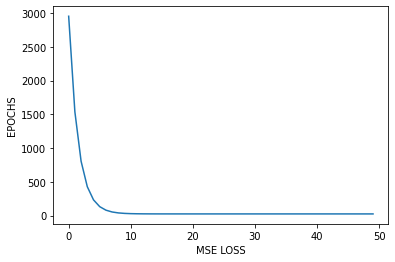

In [154]:
plt.plot(range(epochs),losses)
plt.xlabel('MSE LOSS')
plt.ylabel('EPOCHS')

**Testing our Model**

In [155]:
x = torch.linspace(0.0,50.0,50)
current_weight = model.linear.bias.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x+current_bias

In [156]:
predicted_y

tensor([ 0.9569,  1.9333,  2.9097,  3.8861,  4.8625,  5.8389,  6.8153,  7.7917,
         8.7681,  9.7445, 10.7209, 11.6973, 12.6737, 13.6501, 14.6265, 15.6029,
        16.5793, 17.5557, 18.5321, 19.5085, 20.4849, 21.4613, 22.4377, 23.4141,
        24.3905, 25.3669, 26.3433, 27.3197, 28.2961, 29.2725, 30.2489, 31.2253,
        32.2017, 33.1781, 34.1545, 35.1309, 36.1073, 37.0837, 38.0601, 39.0365,
        40.0129, 40.9893, 41.9657, 42.9421, 43.9185, 44.8949, 45.8713, 46.8477,
        47.8241, 48.8005])

In [157]:
y

tensor([[ -5.],
        [  3.],
        [ 10.],
        [  5.],
        [ 10.],
        [  5.],
        [  9.],
        [ 21.],
        [ 19.],
        [ 23.],
        [ 29.],
        [ 22.],
        [ 33.],
        [ 25.],
        [ 24.],
        [ 27.],
        [ 31.],
        [ 36.],
        [ 46.],
        [ 39.],
        [ 34.],
        [ 38.],
        [ 47.],
        [ 43.],
        [ 58.],
        [ 49.],
        [ 46.],
        [ 54.],
        [ 64.],
        [ 56.],
        [ 61.],
        [ 58.],
        [ 63.],
        [ 63.],
        [ 64.],
        [ 68.],
        [ 73.],
        [ 79.],
        [ 80.],
        [ 84.],
        [ 77.],
        [ 90.],
        [ 78.],
        [ 92.],
        [ 90.],
        [ 84.],
        [ 96.],
        [102.],
        [100.],
        [105.]])

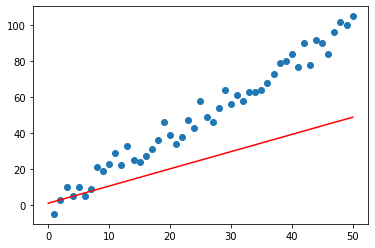

In [158]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')